**1️⃣ Install & Import Dependencies**

In [ ]:
import os
os.kill(os.getpid(), 9)

In [2]:
!pip install torchtext==0.15.2

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch
from torchtext.vocab import FastText
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

**2️⃣ Mount Google Drive & Load Dataset**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/balanced_dataset.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,domain,label
0,realdolladdict.com,0
1,dufunwu.com,1
2,ellegirltalk.nl,0
3,erise.hu,0
4,gugtoqpanho.com,1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('domain').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['label']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('domain')):
  _plot_series(series, series_name, i)
  fig.legend(title='domain', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('label')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('domain')):
  _plot_series(series, series_name, i)
  fig.legend(title='domain', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['domain'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='domain', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['domain'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='label', y='domain', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**3️⃣ Preprocess Data**

In [6]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Tokenizer: Convert domains into sequences
tokenizer = Tokenizer(char_level=True)  # Character-level tokenization
tokenizer.fit_on_texts(df['domain'])
sequences = tokenizer.texts_to_sequences(df['domain'])

# Padding sequences to max length
MAX_LEN = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=MAX_LEN, padding='post')

# Labels
y = df['label'].values

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")

Train: 800000, Val: 100000, Test: 100000


**4️⃣ Load Pretrained FastText Embeddings**

In [7]:
# Load FastText embeddings
fasttext = FastText(language="en")

# Get embedding matrix
embedding_dim = 300  # FastText vector size
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    embedding_matrix[i] = fasttext[word]

print("Embedding Matrix Shape:", embedding_matrix.shape)

.vector_cache/wiki.en.vec: 6.60GB [02:25, 45.4MB/s]                            
100%|██████████| 2519370/2519370 [05:26<00:00, 7707.73it/s]


Embedding Matrix Shape: (40, 300)


**5️⃣ Build the Hybrid Model (FastText + CNN + BiLSTM + Multihead Attention)**

In [8]:
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Bidirectional, Dense, GlobalMaxPooling1D, Input, MultiHeadAttention, Dropout, LayerNormalization
from tensorflow.keras.models import Model

# Define Input
input_layer = Input(shape=(MAX_LEN,))

# Embedding Layer (FastText)
embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            input_length=MAX_LEN,
                            trainable=False)(input_layer)

# CNN Layer
cnn_layer = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(embedding_layer)
cnn_layer = GlobalMaxPooling1D()(cnn_layer)

# BiLSTM Layer
bilstm_layer = Bidirectional(LSTM(128, return_sequences=True))(embedding_layer)

# Multihead Attention Layer
attention_layer = MultiHeadAttention(num_heads=4, key_dim=128)(bilstm_layer, bilstm_layer)
attention_layer = LayerNormalization(epsilon=1e-6)(attention_layer)

# Concatenate Features
concat_layer = tf.keras.layers.Concatenate()([cnn_layer, GlobalMaxPooling1D()(attention_layer)])

# Fully Connected Layers
dense_layer = Dense(128, activation='relu')(concat_layer)
dense_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

# Define Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 73)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 73, 300)        │         12,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 73, 256)        │        439,296 │ embedding[0][0]        │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 73, 256)        │        526,080 │ bidirectional[0][0],   │
│ (MultiHeadAttention)      │                        │                │ bidirectional[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 73, 128)        │        115,328 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 73, 256)        │            512 │ multi_head_attention[… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d      │ (None, 128)            │              0 │ conv1d[0][0]           │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_1    │ (None, 256)            │              0 │ layer_normalization[0… │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 384)            │              0 │ global_max_pooling1d[… │
│                           │                        │                │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         49,280 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │            129 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,142,625 (4.36 MB)

 Trainable params: 1,130,625 (4.31 MB)

 Non-trainable params: 12,000 (46.88 KB)

**6️⃣ Train the Model**

In [10]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=5,
                    batch_size=256,
                    callbacks=[early_stopping])

Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4419s 1s/step - accuracy: 0.9114 - loss: 0.2147 - val_accuracy: 0.9496 - val_loss: 0.1280
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4349s 1s/step - accuracy: 0.9517 - loss: 0.1264 - val_accuracy: 0.9604 - val_loss: 0.1064
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4415s 1s/step - accuracy: 0.9633 - loss: 0.0987 - val_accuracy: 0.9676 - val_loss: 0.0897
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4367s 1s/step - accuracy: 0.9698 - loss: 0.0828 - val_accuracy: 0.9706 - val_loss: 0.0807
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4329s 1s/step - accuracy: 0.9740 - loss: 0.0723 - val_accuracy: 0.9722 - val_loss: 0.0774


**7️⃣ Evaluate the Model**

In [11]:
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 226s 72ms/step
Accuracy: 0.9730
Precision: 0.9768
Recall: 0.9690
F1 Score: 0.9729
ROC AUC: 0.9966


**8️⃣ Plot Confusion Matrix**

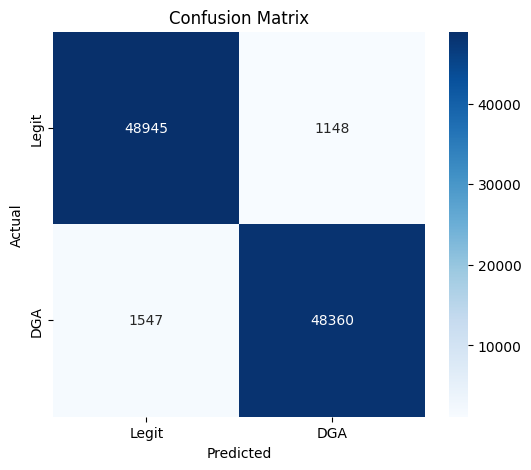

<Figure size 640x480 with 0 Axes>

In [23]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "DGA"], yticklabels=["Legit", "DGA"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
# Save to Drive
plt.savefig('/content/drive/MyDrive/Colab Notebooks/confusion_matrix.png', dpi=300)
plt.show()

**9️⃣ Plot ROC Curve**

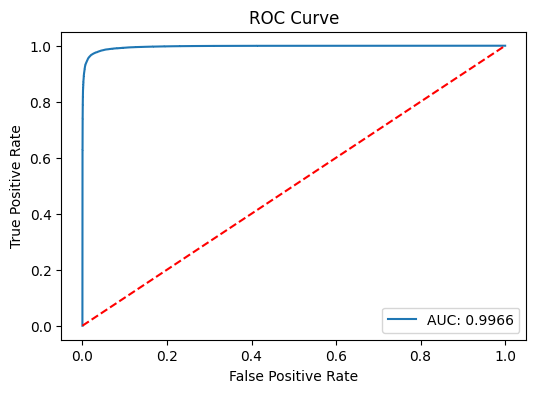

<Figure size 640x480 with 0 Axes>

In [22]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC: {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/roc_curve.png', dpi=300)

**9️⃣ Precision-Recall Curve**

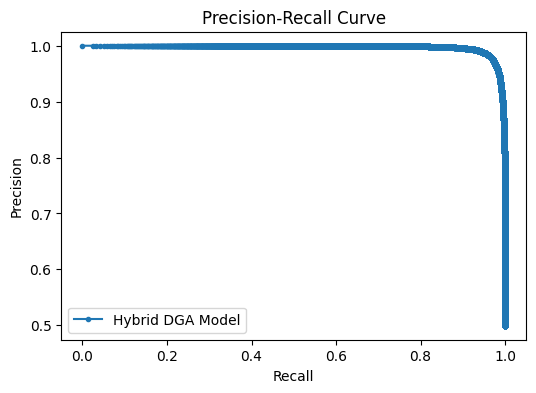

In [19]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.', label='Hybrid DGA Model')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

# Save
plt.savefig('/content/drive/MyDrive/Colab Notebooks/precision_recall_curve.png', dpi=300)
plt.show()